In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, Normalizer
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


## To achieve:

1. Understand the problem
2. Univariable study. We'll just focus on the dependent variable ('Price') and try to know a little bit more about it.
3. Multivariate study. We'll try to understand how the dependent variable and independent variables relate.
4. Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.



In [2]:
trainingData = pd.read_excel('./Data_Train.xlsx')
testingData = pd.read_excel('./Data_Test.xlsx')

In [3]:
trainingData.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
testingData.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [5]:
print('Rows: ', trainingData.shape[0])
print('Columns: ', trainingData.shape[1])
print(trainingData.describe())

Rows:  6019
Columns:  13
              Year  Kilometers_Driven        Seats        Price
count  6019.000000       6.019000e+03  5977.000000  6019.000000
mean   2013.358199       5.873838e+04     5.278735     9.479468
std       3.269742       9.126884e+04     0.808840    11.187917
min    1998.000000       1.710000e+02     0.000000     0.440000
25%    2011.000000       3.400000e+04     5.000000     3.500000
50%    2014.000000       5.300000e+04     5.000000     5.640000
75%    2016.000000       7.300000e+04     5.000000     9.950000
max    2019.000000       6.500000e+06    10.000000   160.000000


In [6]:
print('Rows: ', testingData.shape[0])
print('Columns: ', testingData.shape[1])
print(testingData.describe())

Rows:  1234
Columns:  12
              Year  Kilometers_Driven        Seats
count  1234.000000        1234.000000  1223.000000
mean   2013.400324       58507.288493     5.284546
std       3.179700       35598.702098     0.825622
min    1996.000000        1000.000000     2.000000
25%    2011.000000       34000.000000     5.000000
50%    2014.000000       54572.500000     5.000000
75%    2016.000000       75000.000000     5.000000
max    2019.000000      350000.000000    10.000000


### Columns

In [7]:
print(trainingData.columns)

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')


In [8]:
trainingData['Price'].describe()

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

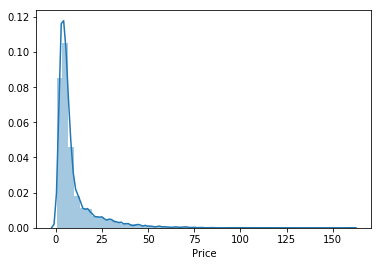

In [9]:
# Histogram
sns.distplot(trainingData['Price'])

In [10]:
# Skewness and Kurtosis
print(trainingData['Price'].skew())
print(trainingData['Price'].kurt())

3.3352319876668415
17.09220197043644


## Data Cleaning and dropping useless values

In [11]:
trainingData.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [12]:
print(trainingData.Location.unique())
print(trainingData.Fuel_Type.unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']


In [13]:
print(trainingData.Transmission.unique())
print(trainingData.Owner_Type.unique())

['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


In [14]:
# Some problem with Seats and unwanted values
print(trainingData.Seats.unique())

print(trainingData.Year.unique())

[ 5.  7.  8.  4.  6.  2. nan 10.  9.  0.]
[2010 2015 2011 2012 2013 2016 2018 2014 2017 2007 2009 2008 2019 2006
 2005 2004 2002 2000 2003 1999 2001 1998]


### Still having confusion with New Price Dataframe, dont know how to use it


## Removing strings from Mileage, Engine and Power

In [15]:
# Power Column training Data
trainingData['Power'] = trainingData['Power'].str.replace(' bhp','')
trainingData['Power'] = trainingData['Power'].convert_objects(convert_numeric = True)

In [16]:
# Power Column testing Data
testingData['Power'] = testingData['Power'].str.replace(' bhp','')
testingData['Power'] = testingData['Power'].convert_objects(convert_numeric = True)

In [17]:
# Engine training Data
trainingData['Engine'] = trainingData['Engine'].str.replace(' CC','')
trainingData['Engine'] = trainingData['Engine'].convert_objects(convert_numeric = True)

In [18]:
# Engine testing Data
testingData['Engine'] = testingData['Engine'].str.replace(' CC','')
testingData['Engine'] = testingData['Engine'].convert_objects(convert_numeric = True)

In [19]:
# Mileage trainingData
trainingData['Mileage'] = trainingData['Mileage'].str.replace(' kmpl','')
trainingData['Mileage'] = trainingData['Mileage'].str.replace(' km/kg','')
trainingData['Mileage'] = trainingData['Mileage'].convert_objects(convert_numeric = True)

In [20]:
# Mileage testingData
testingData['Mileage'] = testingData['Mileage'].str.replace(' kmpl','')
testingData['Mileage'] = testingData['Mileage'].str.replace(' km/kg','')
testingData['Mileage'] = testingData['Mileage'].convert_objects(convert_numeric = True)

In [21]:
# New_Price training Data
trainingData['New_Price'] = trainingData['New_Price'].str.replace(' Lakh','')
trainingData['New_Price'] = trainingData['New_Price'].convert_objects(convert_numeric = True)

In [22]:
# New_Price testing Data
testingData['New_Price'] = testingData['New_Price'].str.replace(' Lakh','')
testingData['New_Price'] = testingData['New_Price'].convert_objects(convert_numeric = True)

In [23]:
trainingData.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [24]:
testingData.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,25.27
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,NaN


## Cleaning data from duplicates, NaNs and selecting reasonable ranges for columns



## Year, Check if too old ?

In [25]:
# If car was too old we should remove
print("Too new: %d" % trainingData.loc[trainingData.Year >= 2017].count()['Name'])
print("Too old: %d" % trainingData.loc[trainingData.Year < 1950].count()['Name'])


Too new: 987
Too old: 0


## Year, Check if expensive or too less ?

In [26]:
print(trainingData.Price.max())
print(trainingData.Price.min())

# Too expensive or too cheap?
print("Too expensive: %d" % trainingData.loc[trainingData.Price >= 150].count()['Name'])
print("Too cheap: %d" % trainingData.loc[trainingData.Price < 0.5].count()['Name'])

160.0
0.44
Too expensive: 1
Too cheap: 4


## Kilometres_driven if very high then its not good value

In [27]:
print(trainingData.Kilometers_Driven.min())
print(trainingData.Kilometers_Driven.max())
# Kilometres driven excess or very less
print("Too many KM: %d" % trainingData.loc[trainingData.Kilometers_Driven >= 900000].count()['Name'])
print("Too few KM: %d" % trainingData.loc[trainingData.Kilometers_Driven < 1000].count()['Name'])

171
6500000
Too many KM: 1
Too few KM: 2


## Anomaly in Power?

In [28]:
# Nothing to remove from power column
print(trainingData.Power.min())
print(trainingData.Power.max())
print(trainingData[trainingData.Power < 35])
print(trainingData[trainingData.Power > 500])


34.2
560.0
                             Name    Location  Year  Kilometers_Driven  \
790       Maruti Omni E 8 Str STD   Hyderabad  2013              26875   
1008  Maruti Omni E MPI STD BS IV       Kochi  2019              11571   
1912  Maruti Omni E MPI STD BS IV      Mumbai  2013              11734   
2196     Maruti Omni MPI STD BSIV  Coimbatore  2017              15473   
2849   Maruti Omni MPI CARGO BSIV     Kolkata  2015              23000   
3091  Maruti Omni E MPI STD BS IV      Jaipur  2015              15000   
3321     Maruti Omni MPI STD BSIV      Jaipur  2012             126000   

     Fuel_Type Transmission Owner_Type  Mileage  Engine  Power  Seats  \
790     Petrol       Manual      First     16.8   796.0   34.2    8.0   
1008    Petrol       Manual      First     16.8   796.0   34.2    8.0   
1912    Petrol       Manual      First     16.8   796.0   34.2    8.0   
2196    Petrol       Manual      First     16.8   796.0   34.2    5.0   
2849    Petrol       Manual    

## Check Engine?

In [29]:
print(trainingData['Engine'].max())
print(trainingData['Engine'].min())
print(trainingData['Engine'].mean())

# print(trainingData[trainingData['Engine']>5000])
print(trainingData[trainingData['Engine']<600])
# One outlier to be removed

5998.0
72.0
1621.276449941501
                      Name Location  Year  Kilometers_Driven Fuel_Type  \
4446  Mahindra E Verito D4  Chennai  2016              50000  Electric   

     Transmission Owner_Type  Mileage  Engine  Power  Seats  New_Price  Price  
4446    Automatic      First      NaN    72.0   41.0    5.0      13.58   13.0  


## Mileage

In [30]:
print(trainingData['Mileage'].min())
print(trainingData['Mileage'].max())
print(trainingData[trainingData['Mileage'] > 6].count())


0.0
33.54
Name                 5949
Location             5949
Year                 5949
Kilometers_Driven    5949
Fuel_Type            5949
Transmission         5949
Owner_Type           5949
Mileage              5949
Engine               5924
Power                5845
Seats                5919
New_Price             802
Price                5949
dtype: int64


## Removing OUTLIERS

In [31]:
# Removing the outliers
# 1. 3 outliers in Kilometres_Driven (6500000, 171, 600)
# 2. 1 outlier in Engine(72)
trainingDataFinal = trainingData[
    (trainingData.Kilometers_Driven <= 9000000)&
    (trainingData.Kilometers_Driven > 0.5)&
    (trainingData.Engine >600)
]
trainingDataFinal.shape

(5982, 13)

In [32]:
# Removing the new_price column
trainingDataFinal = trainingDataFinal.drop_duplicates()
trainingDataFinal = trainingDataFinal[['Name','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats','Price']]
trainingDataFinal = trainingDataFinal.dropna()
trainingDataFinal.shape

(5872, 12)

In [33]:
# Removing the new_price column testingData
testingData = testingData.drop_duplicates()
testingData = testingData[['Name','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats']]
testingData = testingData.dropna()
testingData.shape

(1200, 11)

## Relationship with numerical variables

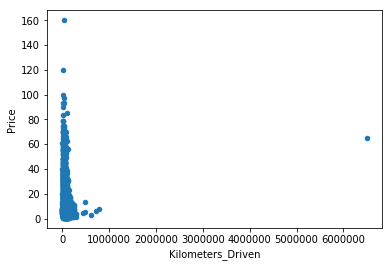

In [34]:
# Scatter Plot of Kilometers_Driven/Price
data = pd.concat([trainingDataFinal['Kilometers_Driven'], trainingData['Price']], axis=1)
data.plot.scatter(x='Kilometers_Driven', y='Price')

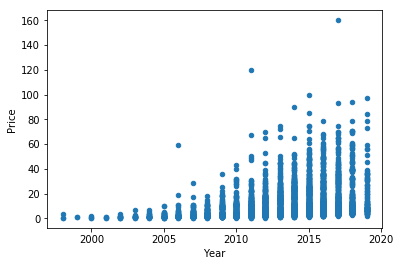

In [35]:
# Scatter Plot of Year/Price
data = pd.concat([trainingDataFinal['Year'], trainingDataFinal['Price']], axis=1)
data.plot.scatter(x='Year', y='Price')

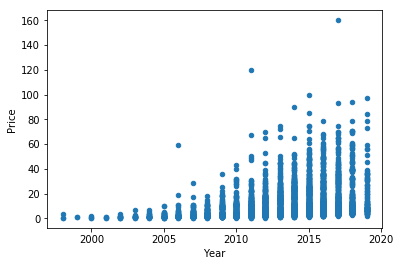

In [36]:
# Scatter Plot of Year/Price
data = pd.concat([trainingDataFinal['Year'], trainingDataFinal['Price']], axis=1)
data.plot.scatter(x='Year', y='Price')

# Histogram

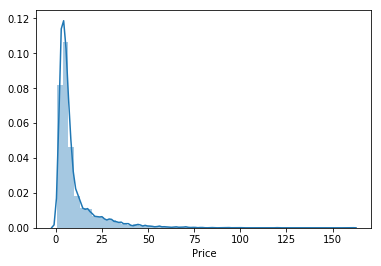

In [37]:
sns.distplot(trainingDataFinal['Price'])

In [38]:
print("-----------------\nData kept for analisys: %d percent of the entire set\n-----------------" % (100 * trainingDataFinal['Name'].count() / trainingData['Name'].count()))

-----------------
Data kept for analisys: 97 percent of the entire set
-----------------


# Checking if any null values are present

In [39]:
trainingDataFinal.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [40]:
trainingDataFinal.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

## Visualizations

In [41]:
trainingDataFinal.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


Transmission
Manual       4170
Automatic    1702
Name: Transmission, dtype: int64


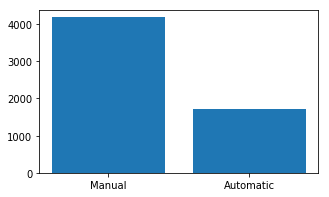

Fuel_Type
Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64


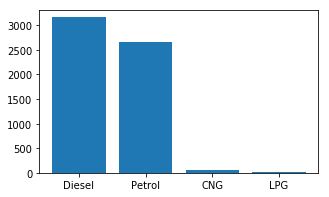

Owner_Type
First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64


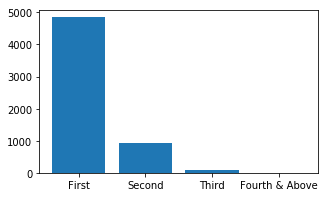

Seats
5.0    4919
7.0     672
8.0     133
4.0      99
6.0      29
Name: Seats, dtype: int64


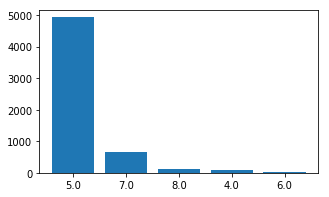

Location
Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Name: Location, dtype: int64


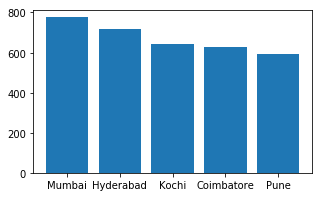

In [42]:
categories = ['Transmission','Fuel_Type', 'Owner_Type', 'Seats', 'Location']

for i, c in enumerate(categories):
    v = trainingDataFinal[c].unique()
    
    g = trainingDataFinal.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    #plt.xticks(r, v)
    plt.xticks(r, g.index)
    plt.show()

## Feature engineering

Lets check if Name and Price has any relation?

In [43]:
trainingDataFinal['NameLength'] = [min(70, len(n)) for n in trainingDataFinal['Name']]

In [44]:
trainingDataFinal.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,NameLength
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,22
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,32
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,12
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,17
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,31


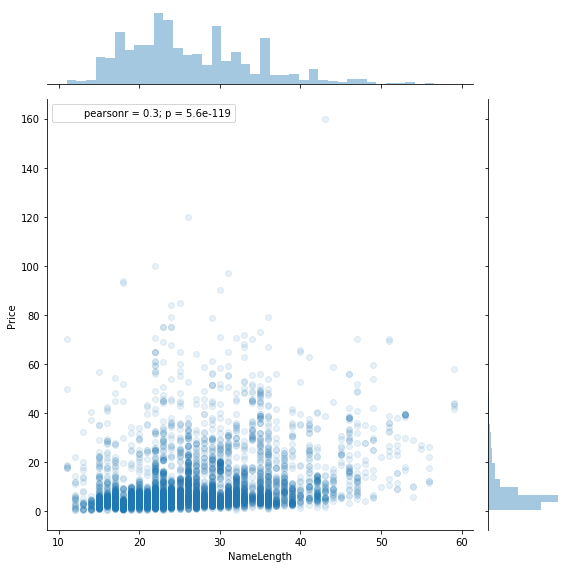

In [45]:
ax = sns.jointplot(x='NameLength', y='Price', data=trainingDataFinal[['NameLength','Price']], alpha=0.1, size=8)

So we understood that NameLength 15 to 35 is better for Sale, because longer name includes more features, optionals and accessories, very long and very short name dont go well with price

### Understanding Label and OneHot Encoding.

## Label Encoder

LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.

#### Problem?

But depending on the data, label encoding introduces a new problem. For example, we have encoded a set of country names into numerical data. This is actually categorical data and there is no relation, of any kind, between the rows.

The problem here is since there are different numbers in the same column, the model will misunderstand the data to be in some kind of order, 0 < 1 <2.

The model may derive a correlation like as the country number increases the population increases but this clearly may not be the scenario in some other data or the prediction set. To overcome this problem, we use One Hot Encoder.


## One- Hot Encoding
What one hot encoding does is, it takes a column which has categorical data, which has been label encoded and then splits the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value. In our example, we’ll get four new columns, one for each country — Japan, U.S, India, and China.

For rows which have the first column value as Japan, the ‘Japan’ column will have a ‘1’ and the other three columns will have ‘0’s. Similarly, for rows which have the first column value as the U.S, the ‘U.s’ column will have a ‘1’ and the other three columns will have ‘0’s and so on.

In [46]:
trainingDataFinal.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,NameLength
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,22
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,32
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,12
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,17
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,31


In [47]:
from sklearn import preprocessing

labels = ['Name', 'Location','Fuel_Type', 'Transmission', 'Owner_Type']
les = {}

for l in labels:
    les[l] = preprocessing.LabelEncoder()
    les[l].fit(trainingDataFinal[l])
    tr = les[l].transform(trainingDataFinal[l])
    trainingDataFinal.loc[:, l + '_feat'] = pd.Series(tr, index=trainingDataFinal.index)

labeled = trainingDataFinal[['Price', 'Seats', 'Power', 'Kilometers_Driven', 'Engine', 'Mileage', 'Year'] + [x + '_feat' for x in labels]]

In [48]:
# Testing Data
from sklearn import preprocessing

labelsTest = ['Name', 'Location','Fuel_Type', 'Transmission', 'Owner_Type']
lesTest = {}

for l in labelsTest:
    lesTest[l] = preprocessing.LabelEncoder()
    lesTest[l].fit(testingData[l])
    trTest = lesTest[l].transform(testingData[l])
    testingData.loc[:, l + '_feat'] = pd.Series(trTest, index=testingData.index)

labeledTest = testingData[['Seats', 'Power', 'Kilometers_Driven', 'Engine', 'Mileage', 'Year'] + [x + '_feat' for x in labelsTest]]

In [49]:
print(labeled.head())

   Price  Seats   Power  Kilometers_Driven  Engine  Mileage  Year  Name_feat  \
0   1.75    5.0   58.16              72000   998.0    26.60  2010       1148   
1  12.50    5.0  126.20              41000  1582.0    19.67  2015        496   
2   4.50    5.0   88.70              46000  1199.0    18.20  2011        470   
3   6.00    7.0   88.76              87000  1248.0    20.77  2012       1015   
4  17.74    5.0  140.80              40670  1968.0    15.20  2013         22   

   Location_feat  Fuel_Type_feat  Transmission_feat  Owner_Type_feat  
0              9               0                  1                0  
1             10               1                  1                0  
2              2               3                  1                0  
3              2               1                  1                0  
4              3               1                  0                2  


In [50]:
print(labeledTest.head())

   Seats   Power  Kilometers_Driven  Engine  Mileage  Year  Name_feat  \
0    4.0   58.20              40929   998.0    32.26  2014        400   
1    5.0   47.30              54493   796.0    24.70  2013        395   
2    7.0  147.80              34000  2393.0    13.68  2017        700   
4    5.0   82.85              29000  1197.0    18.50  2014        322   
5    7.0  140.00              85609  2179.0    16.00  2016        380   

   Location_feat  Fuel_Type_feat  Transmission_feat  Owner_Type_feat  
0              4               0                  1                0  
1              3               3                  1                2  
2              9               1                  1                0  
4              9               3                  1                0  
5              3               1                  1                2  


In [51]:
len(labeled['Name_feat'].unique()) / len(labeled['Name_feat'])

# Labels for the name column account for 62% of the total. I think it's too much, so I remove the feature.

0.30841280653950953

In [52]:
labeled.drop(['Name_feat'], axis='columns', inplace=True)

In [53]:
labeledTest.drop(['Name_feat'], axis='columns', inplace=True)

In [54]:
labeled.head()

,Price,Seats,Power,Kilometers_Driven,Engine,Mileage,Year,Location_feat,Fuel_Type_feat,Transmission_feat,Owner_Type_feat
0,1.75,5.0,58.16,72000,998.0,26.60,2010,9,0,1,0
1,12.50,5.0,126.20,41000,1582.0,19.67,2015,10,1,1,0
2,4.50,5.0,88.70,46000,1199.0,18.20,2011,2,3,1,0
3,6.00,7.0,88.76,87000,1248.0,20.77,2012,2,1,1,0
4,17.74,5.0,140.80,40670,1968.0,15.20,2013,3,1,0,2


In [55]:
labeledTest.head()

,Seats,Power,Kilometers_Driven,Engine,Mileage,Year,Location_feat,Fuel_Type_feat,Transmission_feat,Owner_Type_feat
0,4.0,58.20,40929,998.0,32.26,2014,4,0,1,0
1,5.0,47.30,54493,796.0,24.70,2013,3,3,1,2
2,7.0,147.80,34000,2393.0,13.68,2017,9,1,1,0
4,5.0,82.85,29000,1197.0,18.50,2014,9,3,1,0
5,7.0,140.00,85609,2179.0,16.00,2016,3,1,1,2


## Correlation between Columns

In [56]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

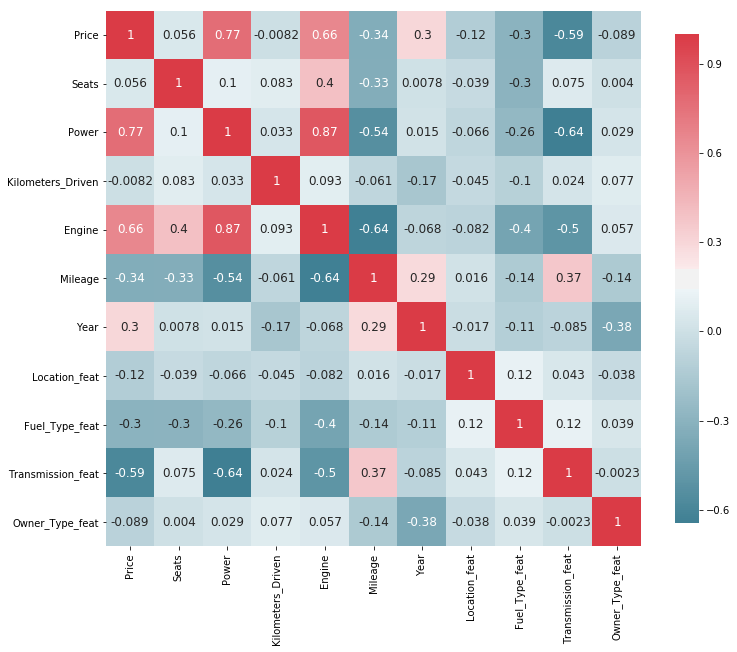

In [57]:
plot_correlation_map(labeled)

In [58]:
labeled.corr()

,Price,Seats,Power,Kilometers_Driven,Engine,Mileage,Year,Location_feat,Fuel_Type_feat,Transmission_feat,Owner_Type_feat
Price,1.000000,0.055547,0.772843,-0.008249,0.658047,-0.341652,0.299475,-0.118238,-0.301626,-0.585623,-0.088584
Seats,0.055547,1.000000,0.101460,0.083072,0.401116,-0.331576,0.007833,-0.038658,-0.297182,0.074554,0.003977
Power,0.772843,0.101460,1.000000,0.033490,0.866301,-0.538844,0.014531,-0.066078,-0.262619,-0.644688,0.029291
Kilometers_Driven,-0.008249,0.083072,0.033490,1.000000,0.093030,-0.060608,-0.169369,-0.045368,-0.104494,0.024111,0.076528
Engine,0.658047,0.401116,0.866301,0.093030,1.000000,-0.637258,-0.068045,-0.082434,-0.399198,-0.501928,0.057346
Mileage,-0.341652,-0.331576,-0.538844,-0.060608,-0.637258,1.000000,0.285623,0.016046,-0.143553,0.368398,-0.144469
Year,0.299475,0.007833,0.014531,-0.169369,-0.068045,0.285623,1.000000,-0.016867,-0.113159,-0.085406,-0.377254
Location_feat,-0.118238,-0.038658,-0.066078,-0.045368,-0.082434,0.016046,-0.016867,1.000000,0.115747,0.043287,-0.038245
Fuel_Type_feat,-0.301626,-0.297182,-0.262619,-0.104494,-0.399198,-0.143553,-0.113159,0.115747,1.000000,0.119206,0.039229
Transmission_feat,-0.585623,0.074554,-0.644688,0.024111,-0.501928,0.368398,-0.085406,0.043287,0.119206,1.000000,-0.002291


## List of most influencing features for the price

In [59]:
labeled.corr().loc[:,'Price'].abs().sort_values(ascending = False)[1:]

Power                0.772843
Engine               0.658047
Transmission_feat    0.585623
Mileage              0.341652
Fuel_Type_feat       0.301626
Year                 0.299475
Location_feat        0.118238
Owner_Type_feat      0.088584
Seats                0.055547
Kilometers_Driven    0.008249
Name: Price, dtype: float64

## Prepare data for training and validation

In [60]:
Y = labeled['Price']
X = labeled.drop(['Price'], axis='columns', inplace=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f40202c1240>]],
      dtype=object)

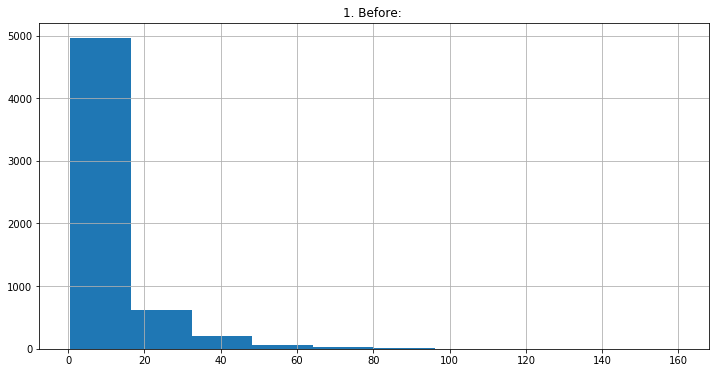

In [61]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"1. Before: ":Y})
prices.hist()

## We see that the Prices column is Skewed right(right tail long)
## So we tune the right skewed Price column

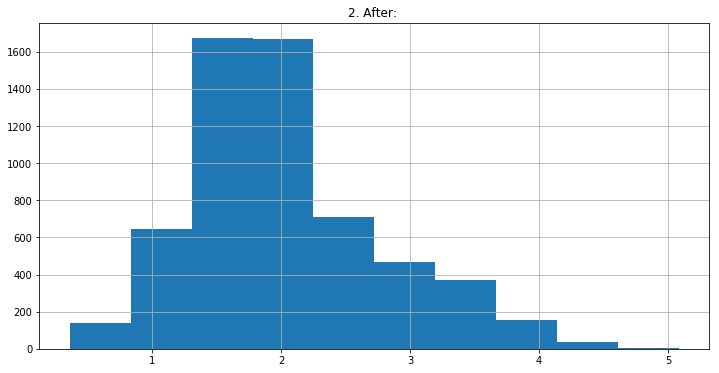

In [62]:
prices_tuned = pd.DataFrame({"2. After: ": np.log1p(Y)})
prices_tuned.hist()
Y = np.log1p(Y)

## Model and Predict

In [63]:
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, ElasticNet, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, train_test_split


def cv_rmse(model, x, y):
    r = np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5))
    return r

# Percent of Data to be set as training set
test_size = 0.33

# Split into training and validation
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=test_size, random_state=3)
print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape)

(3934, 10) (1938, 10) (3934,) (1938,)


## Random forests

Using GridSearch to set the optimal parameters for the regressors, then train the final model

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

In [65]:
param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [500]}

In [66]:
# cv = 2 fold Cross Validation
# n_jobs = Number of jobs to run in parallel.
# verbose = Controls the verbosity: the higher, the more messages.

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train, Y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    2.4s finished


#### Predicting Samples

In [67]:
print(gs.best_score_)
print(gs.best_params_)

0.9128370599259601
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}


In [68]:
bestParams = gs.best_params_
forest = RandomForestRegressor(criterion=bestParams['criterion'], 
                               min_samples_leaf=bestParams['min_samples_leaf'], 
                               min_samples_split=bestParams['min_samples_split'],
                              max_depth=bestParams['max_depth'],
                              n_estimators=bestParams['n_estimators'])

forest.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [69]:
print('Score: %.2f' % forest.score(X_val, Y_val))

Score: 0.93


In [70]:
Y_pred = forest.predict(X_val)

In [71]:
Y_testData_pred = forest.predict(labeledTest)

Feature ranking:
1. feature 1 (0.694394)
2. feature 5 (0.210636)
3. feature 3 (0.034555)
4. feature 2 (0.016707)
5. feature 4 (0.014686)
6. feature 6 (0.010033)
7. feature 8 (0.007722)
8. feature 0 (0.006407)
9. feature 7 (0.003327)
10. feature 9 (0.001533)
['Seats' 'Power' 'Kilometers_Driven' 'Engine' 'Mileage' 'Year'
 'Location_feat' 'Fuel_Type_feat' 'Transmission_feat' 'Owner_Type_feat']


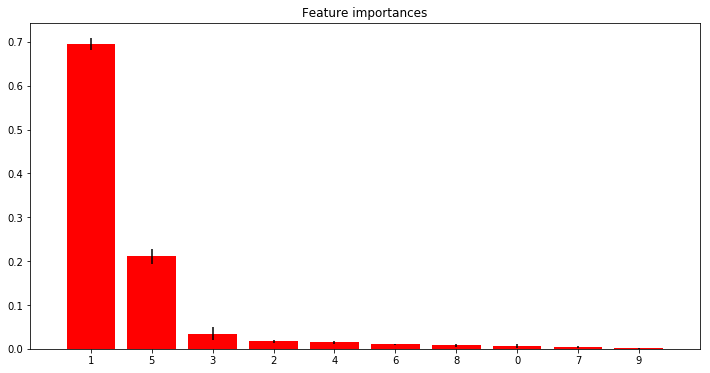

In [72]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

print(X_train.columns.values)
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center",tick_label = X_train.columns.values)
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [74]:
# import math
# def rmsle(y,y_pred):
#     assert len(y) == len(y_pred)
#     terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
#     return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5
from sklearn.metrics import mean_squared_error
print('RMSE is :\n', mean_squared_error(Y_val, Y_pred))

RMSE is :
 0.039764491241747676


Interpreting this value is somewhat more intuitive that the r-squared value. The RMSE measures the distance between our predicted values and actual values.

We can view this relationship graphically with a scatter plot.

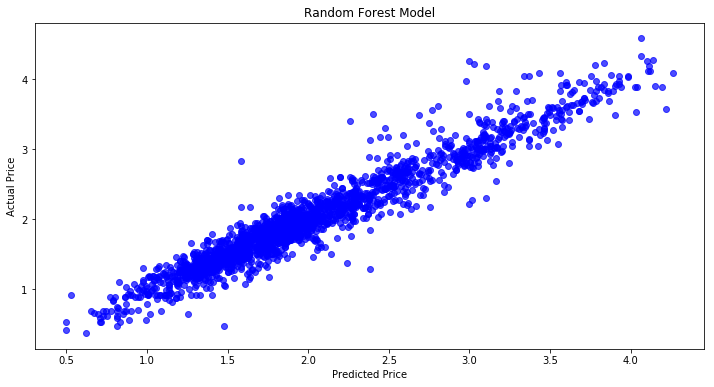

In [75]:
actual_values = Y_val
plt.scatter(Y_pred, Y_val, alpha=0.7, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Random Forest Model')
plt.show()

In [86]:
predictions = np.exp(Y_testData_pred)

In [87]:
predictions

array([ 4.1560882 ,  3.78665469, 18.14128926, ...,  3.89403461,
        5.19095432, 20.37848314])

In [88]:
submissions = pd.DataFrame()

In [89]:
submissions['SalePrice'] = predictions

In [90]:
submissions.head()

,SalePrice
0,4.156088
1,3.786655
2,18.141289
3,5.090053
4,13.780965


In [91]:
submissions.to_csv('Submission.csv', index=False)